In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from pathlib import Path

In [6]:
from sklearn.utils import Bunch

In [7]:
from skimage.io import imread
from skimage.transform import resize
import skimage as sk

In [8]:
def generate_data(Location, dim=(64,64)):
    """we are generating the data into equal dimensions"""
    
    img_dir = Path(Location)
    print(img_dir) 
    folder_dir = [directory for directory in img_dir.iterdir()]
    print(folder_dir)
    categorical_data = [fo.name for fo in folder_dir]
    print(categorical_data)

    images = []
    target = []
    images_data = []

    desc= "Image generation"

    for i, direc in enumerate(folder_dir):
        print(i,direc)
        for files in direc.iterdir():
            print(files)
            img = imread(files)
            img_resize = resize(img, dim)
            images.append(img_resize)
            images_data.append(img_resize.flatten())
            target.append(i) # because target means folder names present in i

    # Converting list into arrays
    images = np.array(images)
    flat_data = np.array(images_data)
    target = np.array(target)
    return Bunch(data = flat_data,
                 target = target,
                 target_names = categorical_data,
                 images = images,
                 desc = desc)
    

In [11]:
dataset =generate_data("fruits")
dataset

fruits
[WindowsPath('fruits/apple images'), WindowsPath('fruits/banana images'), WindowsPath('fruits/guava'), WindowsPath('fruits/lemon')]
['apple images', 'banana images', 'guava', 'lemon']
0 fruits\apple images
fruits\apple images\1.jpg
fruits\apple images\10.jpg
fruits\apple images\11.jpg
fruits\apple images\12.jpg
fruits\apple images\13.jpg
fruits\apple images\14.jpg
fruits\apple images\15.jpg
fruits\apple images\16.jpg
fruits\apple images\17.jpg
fruits\apple images\18.jpg
fruits\apple images\19.jpg
fruits\apple images\2.jpg
fruits\apple images\20.jpg
fruits\apple images\21.jpg
fruits\apple images\22.jpg
fruits\apple images\23.jpg
fruits\apple images\24.jpg
fruits\apple images\25.jpg
fruits\apple images\26.jpg
fruits\apple images\27.jpg
fruits\apple images\28.jpg
fruits\apple images\29.jpg
fruits\apple images\3.jpg
fruits\apple images\30.jpg
fruits\apple images\31.jpg
fruits\apple images\32.jpg
fruits\apple images\33.jpg
fruits\apple images\34.jpg
fruits\apple images\35.jpg
fruits\

{'data': array([[0.95294118, 0.95686275, 0.97647059, ..., 0.91050858, 0.92227328,
         0.94188113],
        [0.32941176, 0.47058824, 0.30490196, ..., 0.36960784, 0.46372549,
         0.25784314],
        [0.27843137, 0.52156863, 0.82352941, ..., 0.09678309, 0.10462623,
         0.14730392],
        ...,
        [0.48210736, 0.62745098, 0.27058824, ..., 0.24540441, 0.40618873,
         0.1526956 ],
        [0.48156403, 0.64227941, 0.23946078, ..., 0.24723499, 0.3335095 ,
         0.08235294],
        [0.17254902, 0.24422727, 0.10196078, ..., 0.484375  , 0.57348106,
         0.3254902 ]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2

In [12]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'desc'])

In [13]:
dataset.data.shape

(204, 12288)

In [14]:
dataset.target_names

['apple images', 'banana images', 'guava', 'lemon']

In [15]:
dataset.target.shape

(204,)

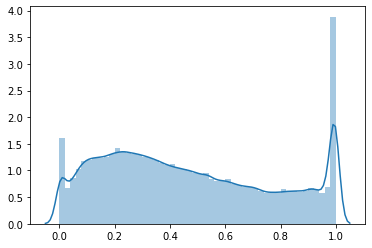

In [16]:
sns.distplot(dataset.data)

In [17]:
x = dataset.data
y= dataset.target

In [18]:
x.shape

(204, 12288)

In [19]:
y.shape

(204,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((153, 12288), (153,), (51, 12288), (51,))

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(max_iter=1000)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
yhat = lr.predict(x_test)

In [27]:
pd.DataFrame({'Actual':y_test,
             'New':yhat,
             'Both are equal':y_test==yhat})

,Actual,New,Both are equal
0,2,2,True
1,3,3,True
2,2,3,False
3,1,3,False
4,0,0,True
5,0,0,True
6,0,1,False
7,0,0,True
8,3,3,True
9,0,0,True


In [28]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [29]:
cm = confusion_matrix(y_test,yhat)

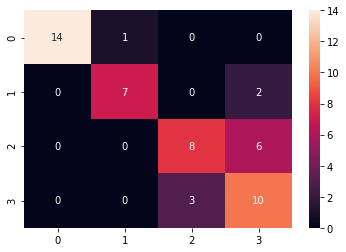

In [30]:
sns.heatmap(cm,annot=True)

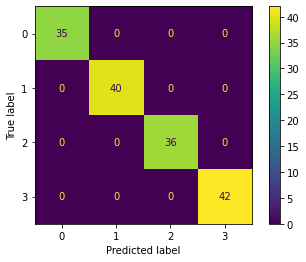

In [31]:
plot_confusion_matrix(lr,x_train,y_train)

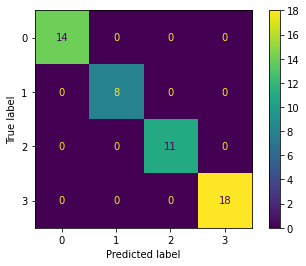

In [32]:
plot_confusion_matrix(lr,x_test,yhat)

In [33]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      0.78      0.82         9
           2       0.73      0.57      0.64        14
           3       0.56      0.77      0.65        13

    accuracy                           0.76        51
   macro avg       0.79      0.76      0.77        51
weighted avg       0.79      0.76      0.77        51



In [34]:
from sklearn.metrics import accuracy_score,precision_score

In [35]:
accuracy_score(y_test,yhat)

0.7647058823529411

# KNN CLASSIFIER

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
knn_yhat = knn.predict(x_test)
knn_yhat

array([2, 2, 3, 3, 0, 0, 0, 0, 3, 0, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 0, 3, 2, 1, 0, 0, 1, 2, 2, 0, 3, 2, 1, 3, 2, 2, 1,
       0, 3, 0, 0, 2, 1, 2])

In [40]:
pd.DataFrame({'Actual':y_test,
             "Knn prediction":knn_yhat,
             "Logistic prediction":yhat,
             "y_test and Knn_yhat":(y_test == knn_yhat),
             "y_test and yhat":(y_test==yhat)})

,Actual,Knn prediction,Logistic prediction,y_test and Knn_yhat,y_test and yhat
0,2,2,2,True,True
1,3,2,3,False,True
2,2,3,3,False,False
3,1,3,3,False,False
4,0,0,0,True,True
5,0,0,0,True,True
6,0,0,1,True,False
7,0,0,0,True,True
8,3,3,3,True,True
9,0,0,0,True,True


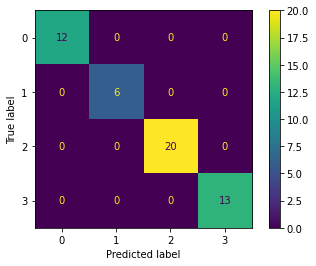

In [41]:
plot_confusion_matrix(knn,x_test,knn_yhat)

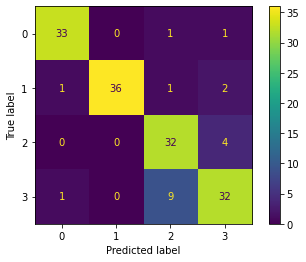

In [42]:
plot_confusion_matrix(knn,x_train,y_train)

In [43]:
cm = confusion_matrix(y_test,knn_yhat)

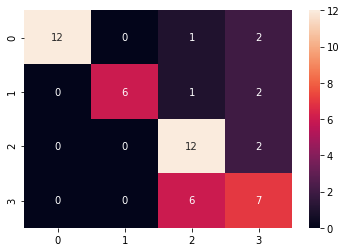

In [44]:
sns.heatmap(cm,annot=True)

In [45]:
print(classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      0.67      0.80         9
           2       0.60      0.86      0.71        14
           3       0.54      0.54      0.54        13

    accuracy                           0.73        51
   macro avg       0.78      0.72      0.73        51
weighted avg       0.77      0.73      0.73        51



In [46]:
tp = cm[0,0]

In [47]:
tn = cm[1,1]

In [48]:
fp = cm[1,0]

In [49]:
fn = cm[0,1]

In [50]:
acc = (tp/tn) / (tp+tn+fp+fn)
acc

0.1111111111111111

In [51]:
from sklearn.metrics import plot_roc_curve

In [53]:
from sklearn.naive_bayes import MultinomialNB,CategoricalNB,ComplementNB,BernoulliNB,GaussianNB

### **MultiNominal Naviebayes**

In [54]:
mnb = MultinomialNB()

In [56]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
mnb_yhat = mnb.predict(x_test)

In [58]:
mnb_yhat

array([2, 3, 3, 1, 0, 0, 1, 0, 3, 1, 1, 3, 2, 3, 3, 2, 1, 2, 0, 3, 3, 2,
       2, 3, 3, 3, 1, 0, 3, 2, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 3, 2, 2, 1,
       0, 2, 0, 0, 1, 1, 1])

In [61]:
cm = confusion_matrix(y_test,mnb_yhat)
cm

array([[12,  3,  0,  0],
       [ 0,  8,  0,  1],
       [ 1,  2,  7,  4],
       [ 0,  1,  3,  9]], dtype=int64)

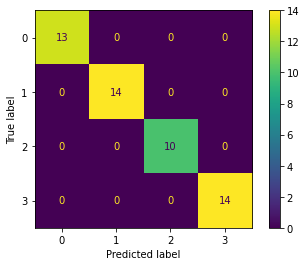

In [62]:
plot_confusion_matrix(mnb,x_test,mnb_yhat)

In [64]:
accuracy_score(y_test,mnb_yhat)

0.7058823529411765

### **Categorical Navie Bayes**

In [69]:
cnb = CategoricalNB()

In [70]:
cnb.fit(x_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
cnb_yhat = cnb.predict(x_test[[0]])
cnb_yhat

array([3])

### **Gaussiab NavieBayes**

In [79]:
gb = GaussianNB()

In [81]:
gb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
gb_yhat = gb.predict(x_test)
gb_yhat

array([2, 2, 2, 3, 0, 0, 0, 0, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2,
       2, 3, 3, 2, 2, 0, 3, 2, 1, 0, 0, 1, 3, 2, 0, 0, 2, 1, 3, 3, 2, 1,
       0, 2, 3, 0, 1, 1, 3])

In [84]:
cm = confusion_matrix(y_test,gb_yhat)

In [85]:
cm

array([[12,  0,  2,  1],
       [ 0,  7,  0,  2],
       [ 0,  0, 12,  2],
       [ 0,  0,  6,  7]], dtype=int64)

In [86]:
print(classification_report(y_test,gb_yhat))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      0.78      0.88         9
           2       0.60      0.86      0.71        14
           3       0.58      0.54      0.56        13

    accuracy                           0.75        51
   macro avg       0.80      0.74      0.76        51
weighted avg       0.78      0.75      0.75        51



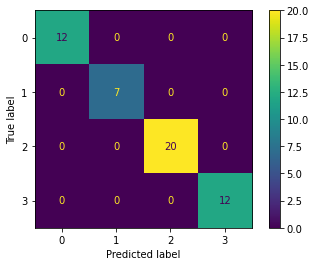

In [87]:
plot_confusion_matrix(gb,x_test,gb_yhat)

In [88]:
accuracy_score(y_test,gb_yhat)

0.7450980392156863

### **Complement Navie Bayes**

In [89]:
cb = ComplementNB()

In [90]:
cb.fit(x_train,y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [91]:
cb_yhat = cb.predict(x_test)
cb_yhat

array([2, 3, 3, 1, 0, 0, 0, 0, 3, 1, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 3, 3, 0,
       0, 3, 0, 0, 1, 0, 1])

In [92]:
cm = confusion_matrix(y_test,cb_yhat)
cm

array([[14,  1,  0,  0],
       [ 6,  2,  0,  1],
       [ 1,  2,  2,  9],
       [ 0,  1,  0, 12]], dtype=int64)

In [93]:
print(classification_report(y_test,cb_yhat))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78        15
           1       0.33      0.22      0.27         9
           2       1.00      0.14      0.25        14
           3       0.55      0.92      0.69        13

    accuracy                           0.59        51
   macro avg       0.64      0.56      0.50        51
weighted avg       0.67      0.59      0.52        51



In [94]:
accuracy_score(y_test,cb_yhat)

0.5882352941176471

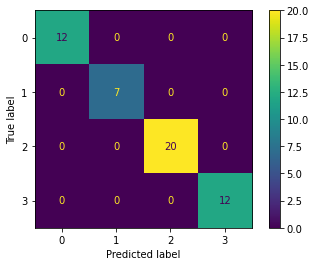

In [95]:
plot_confusion_matrix(gb,x_test,gb_yhat)

### **Bernoulli Navie Bayes**

In [96]:
b = BernoulliNB()

In [97]:
b.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [98]:
b_yhat = b.predict(x_test)
b_yhat

array([3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3])

In [99]:
cm = confusion_matrix(y_test,gb_yhat)
cm

array([[12,  0,  2,  1],
       [ 0,  7,  0,  2],
       [ 0,  0, 12,  2],
       [ 0,  0,  6,  7]], dtype=int64)

In [100]:
print(classification_report(y_test,gb_yhat))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      0.78      0.88         9
           2       0.60      0.86      0.71        14
           3       0.58      0.54      0.56        13

    accuracy                           0.75        51
   macro avg       0.80      0.74      0.76        51
weighted avg       0.78      0.75      0.75        51



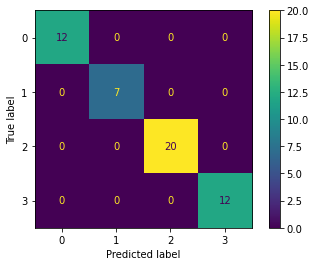

In [101]:
plot_confusion_matrix(gb,x_test,gb_yhat,cmap='viridis')

In [106]:
from sklearn.model_selection import cross_val_score
models = [gb,mnb,cb,b,lr,knn]
for i in models:
    cv = cross_val_score(i,x_train,y_train,cv=4)
    print("Model name",i)
    print("Model score",i.score(x_test,yhat))
    print("*"*30)

Model name GaussianNB(priors=None, var_smoothing=1e-09)
Model score 0.7843137254901961
******************************
Model name MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Model score 0.8235294117647058
******************************
Model name ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
Model score 0.5882352941176471
******************************
Model name BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Model score 0.3137254901960784
******************************
Model name LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model score 1.0
******************************
Model name KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkow

Here I conclude that for this Dataset Logistic ression algorithm is best model because model score is 100% while compared with other classification models